In [1]:
# https://www.kaggle.com/lucabasa/the-data-science-book-of-love

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import os

warnings.filterwarnings("ignore")

wd="C:/Users/Abhinav/Desktop/Data-Analysis/Data science for Dating/"
os.chdir(wd)


### 1. Load data

In [2]:
df_full=pd.read_csv("Speed_Dating_Data.csv", encoding='ISO-8859-1')
df_full.head()

#df.shape

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [3]:
personal = ['gender', 'age', 'field', 'field_cd', 'undergra',
       'mn_sat', 'tuition', 'race', 'imprace', 'imprelig', 'from',
       'zipcode', 'income', 'goal', 'date', 'go_out', 'career',
       'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy',
       'expnum','match_es']
decision = ['match','dec',
       'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob',
       'met']
evaluation = ['satis_2', 'length', 'numdat_2']
outcome = ['you_call', 'them_cal', 'date_3', 'numdat_3',
       'num_in_3']

In [4]:
df=df_full[['iid','wave'] + personal + evaluation + outcome].drop_duplicates().copy()

df.shape


(551, 48)

### 1.1 Check for missing values

In [5]:
df.isnull().sum()

iid           0
wave          0
gender        0
age           8
field         6
field_cd      7
undergra    236
mn_sat      349
tuition     317
race          6
imprace       7
imprelig      7
from          7
zipcode      76
income      270
goal          7
date          8
go_out        7
career        8
career_c     12
sports        7
tvsports      7
exercise      7
dining        7
museums       7
art           7
hiking        7
gaming        7
clubbing      7
reading       7
tv            7
theater       7
movies        7
concerts      7
music         7
shopping      7
yoga          7
exphappy      8
expnum      425
match_es     72
satis_2      66
length       66
numdat_2     69
you_call    288
them_cal    288
date_3      288
numdat_3    458
num_in_3    511
dtype: int64

### 1.2 Heatmap

Text(0.5, 1.0, 'Heatmap of features')

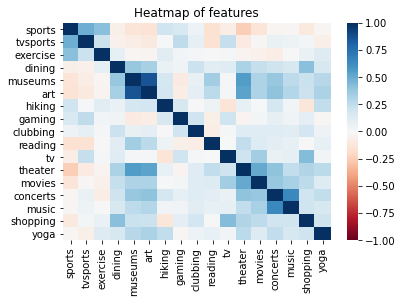

In [6]:
data_corr=df[['sports', 'tvsports', 'exercise', 'dining', 'museums',
       'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
       'movies', 'concerts', 'music', 'shopping', 'yoga']].corr(method="pearson")
ax=sns.heatmap(data_corr, vmin=-1, vmax=1, annot=False ,fmt=".2f", cmap='RdBu')
ax.set_title("Heatmap of features")

### 1.3 EDA plots and analysis

### 1.3.1 By gender,age

Male      277
Female    274
Name: gender, dtype: int64

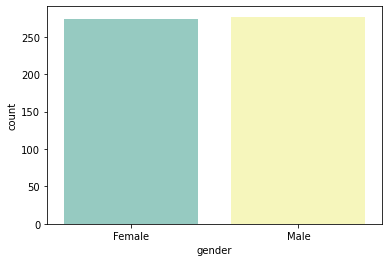

In [7]:
df.loc[df['gender']==0,'gender']='Female'
df.loc[df['gender']==1,'gender']='Male'


sns.countplot(x='gender', data=df, palette='Set3')

df['gender'].value_counts()

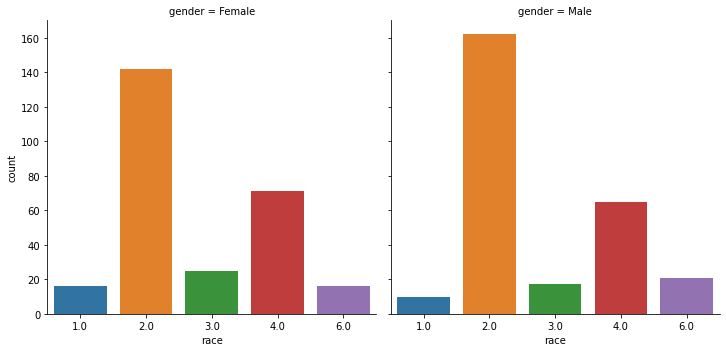

In [8]:
sns.factorplot(x='race', col='gender',kind='count', data=df)


Text(0.5, 1.0, 'Distplot by age')

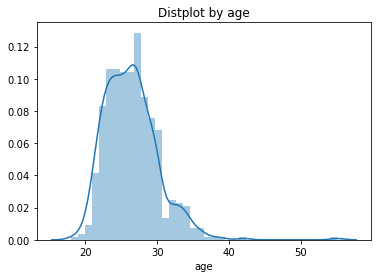

In [9]:
sns.distplot(df['age'])
plt.title('Distplot by age')

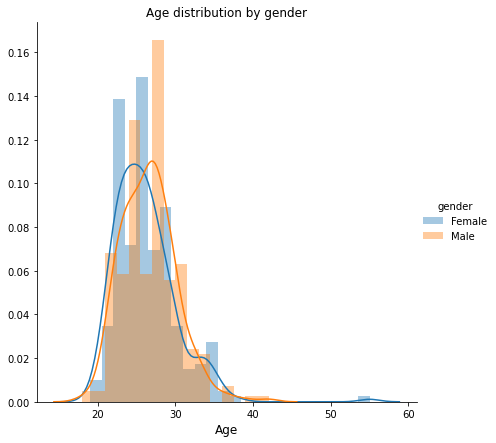

In [10]:
g = sns.FacetGrid(df, hue='gender', height = 6)
g.map(sns.distplot, 'age')
g.set_xlabels('Age', fontsize=12)
plt.title('Age distribution by gender')
g.add_legend()

In [11]:
df[['gender', 'age']].groupby('gender').agg(['mean', 'median', 'min', 'max', 'count'])

age                         
             mean median   min   max count
gender                                    
Female  26.126394   26.0  19.0  55.0   269
Male    26.587591   27.0  18.0  42.0   274

### 1.3.2 By race,age

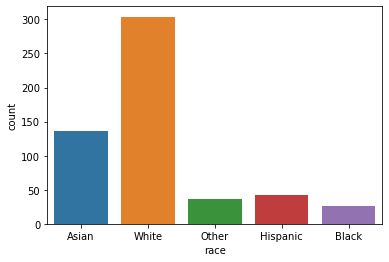

In [12]:
df.loc[(df['race']==1),['race']]='Black'
df.loc[(df['race']==2),['race']]='White'
df.loc[(df['race']==3),['race']]='Hispanic'
df.loc[(df['race']==4),['race']]='Asian'
df.loc[(df['race']==5),['race']]='Native American'
df.loc[(df['race']==6),['race']]='Other'



sns.countplot(x='race', data=df)

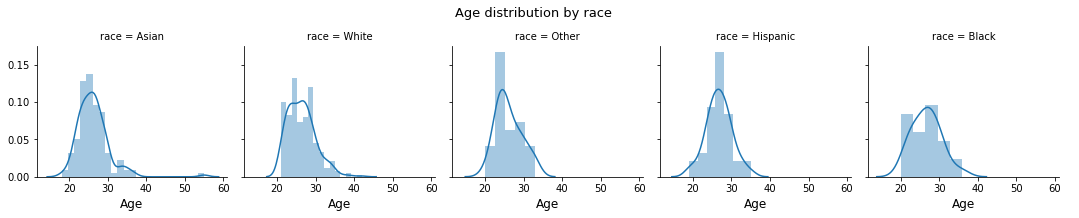

In [13]:
g = sns.FacetGrid(df, col='race', height = 3)
g.map(sns.distplot, 'age')
g.set_xlabels('Age', fontsize=12)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Age distribution by race', fontsize=13)
g.add_legend()

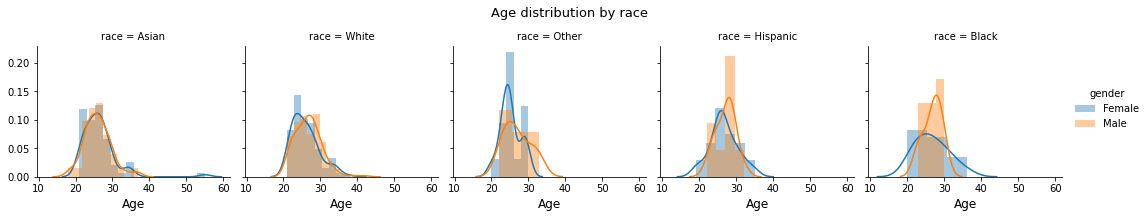

In [14]:
g = sns.FacetGrid(df, col='race',hue='gender', height = 3)
g.map(sns.distplot, 'age')
g.set_xlabels('Age', fontsize=12)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Age distribution by race', fontsize=13)
g.add_legend()

In [15]:
df[['age','race','gender']].groupby(['race','gender']).agg(['mean','median','min','max','count'])

age                         
                      mean median   min   max count
race     gender                                    
Asian    Female  26.380282   26.0  21.0  55.0    71
         Male    26.000000   26.0  18.0  37.0    65
Black    Female  26.625000   26.0  20.0  36.0    16
         Male    26.800000   27.0  23.0  30.0    10
Hispanic Female  26.600000   26.0  19.0  35.0    25
         Male    27.058824   28.0  22.0  32.0    17
Other    Female  25.125000   25.0  20.0  30.0    16
         Male    26.952381   27.0  22.0  33.0    21
White    Female  25.971631   25.0  21.0  38.0   141
         Male    26.714286   27.0  21.0  42.0   161

### 1.3.3 By field of study

Text(0.5, 1.0, 'By field of study')

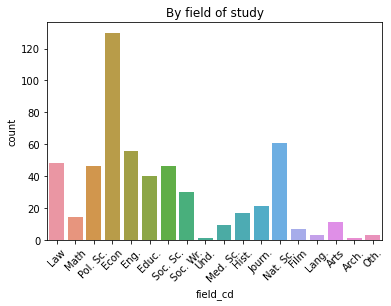

In [16]:
df['field_cd'] = df.field_cd.map({1: 'Law', 2: 'Math', 3: 'Soc. Sc.', 4: 'Med. Sc.',
                                 5: 'Eng.', 6: 'Journ.', 7: 'Hist.', 8: 'Econ', 9: 'Educ.',
                                 10: 'Nat. Sc.', 11: 'Soc. Wr.', 12: 'Und.', 13: 'Pol. Sc.',
                                 14: 'Film', 15: 'Arts', 16:'Lang.', 17: 'Arch.', 18: 'Oth.'}).fillna(df.field_cd)

ax=sns.countplot(x='field_cd', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.title('By field of study')


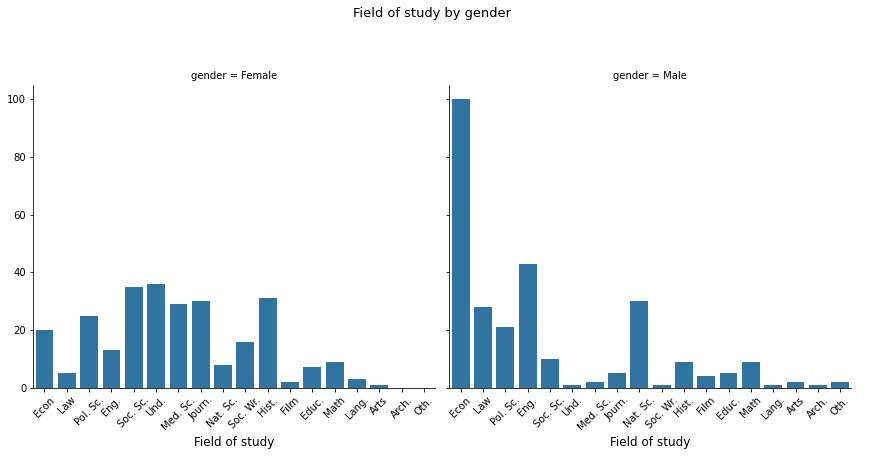

In [17]:
g = sns.FacetGrid(df, col='gender', height = 6)
g.map(sns.countplot, 'field_cd')
g.set_xlabels('Field of study', fontsize=12)
g.set_xticklabels(rotation=45)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Field of study by gender', fontsize=13)
g.add_legend()

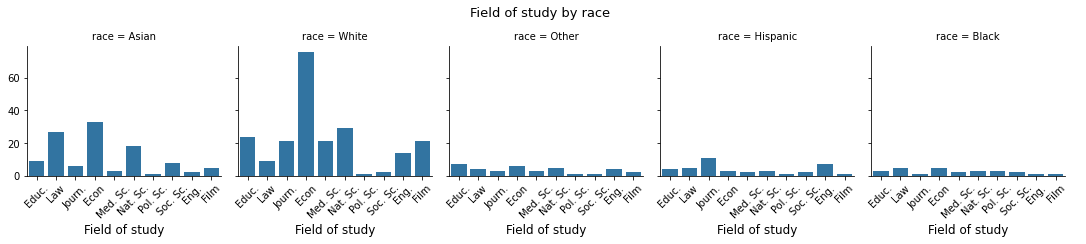

In [18]:
g = sns.FacetGrid(df, col='race', height = 3)
g.map(sns.countplot, 'field_cd')
g.set_xlabels('Field of study', fontsize=12)
g.set_xticklabels(rotation=45)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Field of study by race', fontsize=13)
g.add_legend()

### 1.3.4 By race importance 

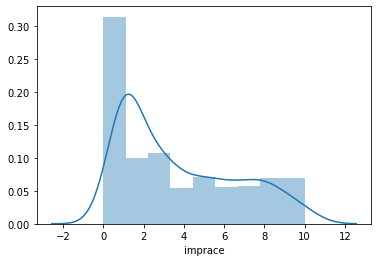

In [19]:
sns.distplot(df['imprace'])

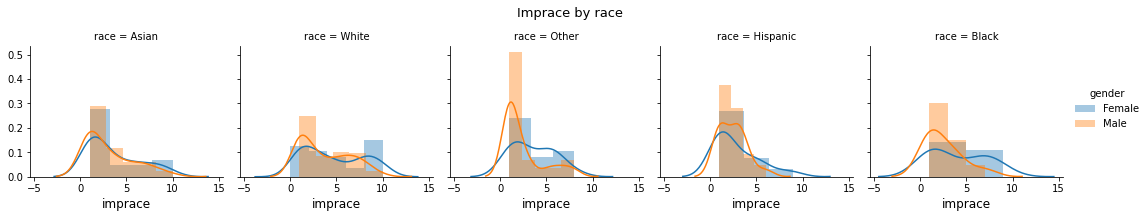

In [20]:
g = sns.FacetGrid(df, col='race',hue='gender', height = 3)
g.map(sns.distplot, 'imprace')
g.set_xlabels('imprace', fontsize=12)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Imprace by race', fontsize=13)
g.add_legend()

In [21]:
df[['imprace','race','gender']].groupby(['race','gender']).agg(['mean','median','count','min','max'])

imprace                        
                     mean median count  min   max
race     gender                                  
Asian    Female  3.633803    3.0    71  1.0  10.0
         Male    3.107692    2.0    65  1.0  10.0
Black    Female  4.062500    3.0    16  1.0   9.0
         Male    2.500000    1.5    10  1.0   7.0
Hispanic Female  2.840000    2.0    25  1.0   9.0
         Male    2.411765    3.0    17  1.0   6.0
Other    Female  3.562500    3.0    16  1.0   8.0
         Male    2.380952    1.0    21  1.0   8.0
White    Female  4.652482    4.0   141  0.0  10.0
         Male    3.740741    3.0   162  1.0  10.0

[Text(0, 0, 'Asian'),
 Text(0, 0, 'Black'),
 Text(0, 0, 'Hispanic'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'White')]

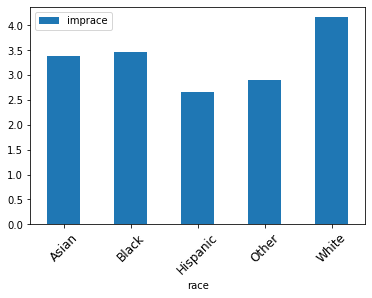

In [22]:
ax=df[['imprace','race']].groupby(['race']).mean().plot(kind='bar')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=45)


Text(0.5, 1.0, 'Importance of race')

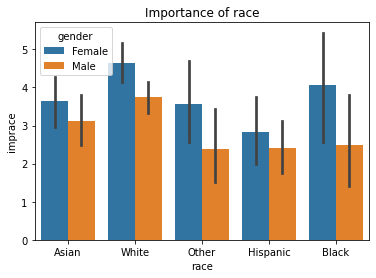

In [23]:
sns.barplot(x=df['race'], y=df['imprace'], hue=df['gender'])
plt.title('Importance of race')

### 1.3.5 By Imporance religion

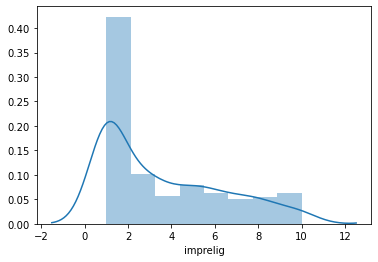

In [24]:
sns.distplot(df['imprelig'])

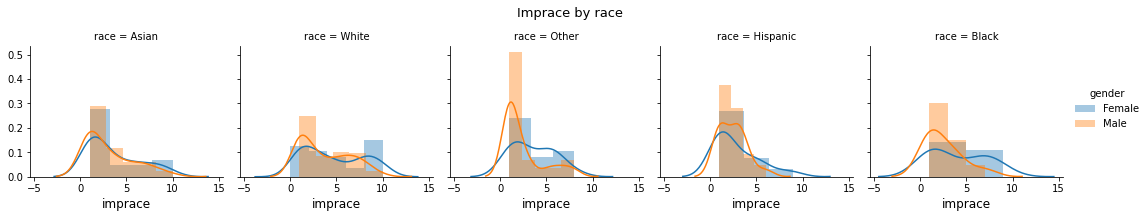

In [25]:
g = sns.FacetGrid(df, col='race',hue='gender', height = 3)
g.map(sns.distplot, 'imprace')
g.set_xlabels('imprace', fontsize=12)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('Imprace by race', fontsize=13)
g.add_legend()

In [26]:
df[['imprelig','race','gender']].groupby(['race','gender']).agg(['mean','median','count','min','max'])

imprelig                        
                     mean median count  min   max
race     gender                                  
Asian    Female  3.549296    3.0    71  1.0  10.0
         Male    2.476923    1.0    65  1.0   8.0
Black    Female  3.875000    2.5    16  1.0  10.0
         Male    1.800000    1.0    10  1.0   4.0
Hispanic Female  3.360000    3.0    25  1.0  10.0
         Male    3.117647    3.0    17  1.0   9.0
Other    Female  4.687500    4.5    16  1.0  10.0
         Male    2.476190    1.0    21  1.0   9.0
White    Female  4.553191    4.0   141  1.0  10.0
         Male    3.395062    2.0   162  1.0  10.0

[Text(0, 0, 'Asian'),
 Text(0, 0, 'Black'),
 Text(0, 0, 'Hispanic'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'White')]

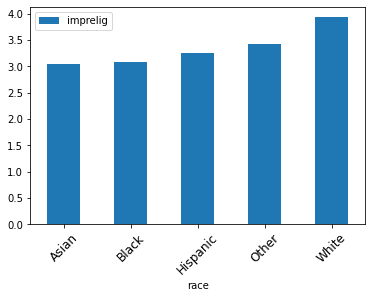

In [27]:
ax=df[['imprelig','race']].groupby(['race']).mean().plot(kind='bar')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=45)

Text(0.5, 1.0, 'Importance of religion')

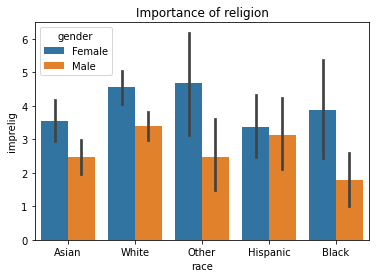

In [28]:
sns.barplot(x=df['race'], y=df['imprelig'], hue=df['gender'])
plt.title('Importance of religion')

[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '19'),
 Text(0, 0, '20'),
 Text(0, 0, '21')]

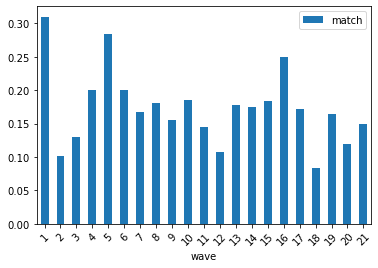

In [29]:
ax=df_full[['wave', 'match']].groupby('wave').mean().plot(kind='bar')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

### 2. Machine learning 

In [30]:
df_train=df_full.loc[:,['dec','gender','condtn','wave','order','int_corr','samerace','exphappy','age','age_o','imprelig','imprace','goal','date','go_out','field_cd','attr1_1','sinc1_1','intel1_1','fun1_1','amb1_1']].copy()
df_train=df_train.dropna()
Y_data=df_train[['dec']]
X_data=df_train.drop(labels=['dec'],axis=1)


In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_data['age']=sc.fit_transform(X_data.loc[:,['age']])
X_data['age_o']=sc.fit_transform(X_data.loc[:,['age_o']])
X_data['attr1_1']=sc.fit_transform(X_data.loc[:,['attr1_1']])
X_data['sinc1_1']=sc.fit_transform(X_data.loc[:,['sinc1_1']])
X_data['intel1_1']=sc.fit_transform(X_data.loc[:,['intel1_1']])
X_data['fun1_1']=sc.fit_transform(X_data.loc[:,['fun1_1']])
X_data['amb1_1']=sc.fit_transform(X_data.loc[:,['amb1_1']])
X_data['imprace']=sc.fit_transform(X_data.loc[:,['imprace']])
X_data['imprelig']=sc.fit_transform(X_data.loc[:,['imprelig']])
X_data['exphappy']=sc.fit_transform(X_data.loc[:,['exphappy']])
X_data['order']=sc.fit_transform(X_data.loc[:,['order']])



X_data.head()


,gender,condtn,wave,order,int_corr,samerace,exphappy,age,age_o,imprelig,imprace,goal,date,go_out,field_cd,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1
0,0,1,1,-0.905115,0.14,0,-1.46415,-1.509042,0.174909,0.116766,-0.626619,2.0,7.0,1.0,1.0,-0.594362,0.367944,-0.038613,-0.394357,0.698866
1,0,1,1,-1.087534,0.54,0,-1.46415,-1.509042,-1.230854,0.116766,-0.626619,2.0,7.0,1.0,1.0,-0.594362,0.367944,-0.038613,-0.394357,0.698866
2,0,1,1,0.189398,0.16,1,-1.46415,-1.509042,-1.230854,0.116766,-0.626619,2.0,7.0,1.0,1.0,-0.594362,0.367944,-0.038613,-0.394357,0.698866
3,0,1,1,-0.722697,0.61,0,-1.46415,-1.509042,-0.949701,0.116766,-0.626619,2.0,7.0,1.0,1.0,-0.594362,0.367944,-0.038613,-0.394357,0.698866
4,0,1,1,-0.357859,0.21,0,-1.46415,-1.509042,-0.668548,0.116766,-0.626619,2.0,7.0,1.0,1.0,-0.594362,0.367944,-0.038613,-0.394357,0.698866


In [32]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()

X_data.loc[X_data['gender']==0,['gender']]='Female'
X_data.loc[X_data['gender']==1,['gender']]='Male'

X_data.head()


X_data['gender']=encode.fit_transform(X_data.loc[:,['gender']])
X_data.head()  

#dict(zip(encode.classes_,encode.transform(encode.classes_)))

,gender,condtn,wave,order,int_corr,samerace,exphappy,age,age_o,imprelig,imprace,goal,date,go_out,field_cd,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1
0,0,1,1,-0.905115,0.14,0,-1.46415,-1.509042,0.174909,0.116766,-0.626619,2.0,7.0,1.0,1.0,-0.594362,0.367944,-0.038613,-0.394357,0.698866
1,0,1,1,-1.087534,0.54,0,-1.46415,-1.509042,-1.230854,0.116766,-0.626619,2.0,7.0,1.0,1.0,-0.594362,0.367944,-0.038613,-0.394357,0.698866
2,0,1,1,0.189398,0.16,1,-1.46415,-1.509042,-1.230854,0.116766,-0.626619,2.0,7.0,1.0,1.0,-0.594362,0.367944,-0.038613,-0.394357,0.698866
3,0,1,1,-0.722697,0.61,0,-1.46415,-1.509042,-0.949701,0.116766,-0.626619,2.0,7.0,1.0,1.0,-0.594362,0.367944,-0.038613,-0.394357,0.698866
4,0,1,1,-0.357859,0.21,0,-1.46415,-1.509042,-0.668548,0.116766,-0.626619,2.0,7.0,1.0,1.0,-0.594362,0.367944,-0.038613,-0.394357,0.698866


In [33]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_data,Y_data,test_size=0.2,random_state=1)


In [34]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


### 2.1 Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

results=pd.DataFrame()
results['LR_pred']=y_pred


In [36]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_pred)


0.546394843118981

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred,target_names=["No","Yes"]))

              precision    recall  f1-score   support

          No       0.60      0.81      0.69       925
         Yes       0.53      0.28      0.37       696

    accuracy                           0.58      1621
   macro avg       0.57      0.55      0.53      1621
weighted avg       0.57      0.58      0.55      1621



Text(0.5, 1.0, 'Confusion Matrix')

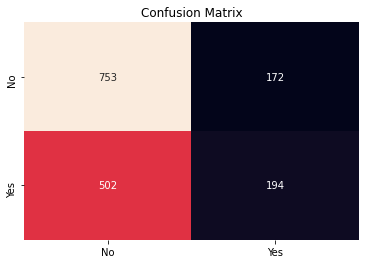

In [38]:
from sklearn.metrics import confusion_matrix

ans=confusion_matrix(y_test,y_pred)

sns.heatmap(ans, annot=True, cbar=False, fmt='d', xticklabels=["No","Yes"],yticklabels=["No","Yes"])
plt.title("Confusion Matrix")

In [39]:
lr.score(X_test,y_test) #accuracy

print(lr.coef_, lr.intercept_) # coeff of Logistics regression

X_test.head()

[[ 0.44518359 -0.15545805 -0.00318835 -0.04552459  0.12343861  0.19083848
   0.13604026 -0.01264776 -0.12112377 -0.0562812  -0.13525128 -0.0049379
  -0.07624655  0.09714769 -0.01653503 -0.25693277 -0.05462674 -0.08627859
  -0.09480848 -0.05303839]] [-0.01908988]


,gender,condtn,wave,order,int_corr,samerace,exphappy,age,age_o,imprelig,imprace,goal,date,go_out,field_cd,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1
7693,0,2,21,0.371817,-0.06,1,0.277143,-0.106228,1.018367,-0.949523,-0.275065,1.0,3.0,1.0,11.0,-0.996172,1.790419,-0.038613,-0.394357,0.698866
6937,0,2,19,1.101492,0.15,0,-0.883719,0.735460,1.018367,-0.949523,-0.978173,1.0,4.0,2.0,4.0,-0.996172,0.367944,0.698090,1.254256,-0.120685
39,0,1,1,-0.175440,-0.19,1,-2.625012,-0.947916,-0.668548,-0.949523,-0.978173,1.0,5.0,1.0,1.0,-0.192552,0.367944,-0.038613,0.429950,-0.120685
3556,1,1,10,0.006979,0.81,0,0.857574,-0.386791,0.174909,-0.949523,-0.978173,4.0,2.0,1.0,6.0,-0.192552,0.367944,-0.038613,0.429950,-0.120685
489,0,2,2,-1.452372,-0.43,0,-2.044581,-0.667354,1.018367,0.116766,0.779597,5.0,6.0,4.0,1.0,-0.192552,0.367944,-0.038613,-0.394357,0.698866


In [40]:
y_test.head()

#y_test.reset_index(drop=True, inplace=True)  #reset index


,dec
7693,1
6937,1
39,1
3556,1
489,0


### 2.2 Random forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf=RandomForestClassifier(random_state=1)

parameters={'n_estimators':[50,100,200], 
           'max_depth': [2,3,4,5]}

grid1=GridSearchCV(rf, parameters, cv=7, scoring='accuracy', return_train_score=True)
grid1.fit(X_train, y_train)


print(grid1.best_params_)


{'max_depth': 5, 'n_estimators': 200}


In [42]:
grid1.cv_results_['mean_train_score'][grid1.best_index_]

grid1.cv_results_['mean_test_score'][grid1.best_index_]

grid1.best_estimator_.fit(X_train,y_train)

y_pred=grid1.best_estimator_.predict(X_test)


In [43]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_pred)

0.572459614787201

In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred,target_names=["no","yes"]))

              precision    recall  f1-score   support

          no       0.61      0.94      0.74       925
         yes       0.72      0.21      0.32       696

    accuracy                           0.62      1621
   macro avg       0.66      0.57      0.53      1621
weighted avg       0.66      0.62      0.56      1621



Text(0.5, 1.0, 'confusion matrix')

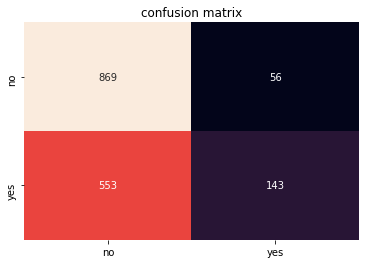

In [45]:
from sklearn.metrics import confusion_matrix

ans=confusion_matrix(y_test,y_pred)

sns.heatmap(ans, annot=True, cbar=False, fmt='d', xticklabels=["no","yes"], yticklabels=["no","yes"])
plt.title("confusion matrix")


### 2.3 Gradient boosted classifier

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

gb=GradientBoostingClassifier(max_depth=5, random_state=1)

parameters={'n_estimators':[50,100,200],
            'learning_rate':[.001,.01,.1,1,10]}

grid2=GridSearchCV(gb, parameters, cv=7, scoring='accuracy', return_train_score=True)
grid2.fit(X_train,y_train)

grid2.cv_results_['mean_train_score'][grid2.best_index_]

grid2.cv_results_['mean_test_score'][grid2.best_index_]




0.6576673866090712

In [47]:
grid2.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [48]:
final_gb=grid2.best_estimator_
final_gb.fit(X_train,y_train)

y_pred=final_gb.predict(X_test)

In [49]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_pred)

0.6561307859583722

In [50]:
final_gb.score(X_test,y_test) #accuracy

0.6785934608266502

In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred,target_names=["no","yes"]))

              precision    recall  f1-score   support

          no       0.68      0.82      0.74       925
         yes       0.67      0.50      0.57       696

    accuracy                           0.68      1621
   macro avg       0.68      0.66      0.66      1621
weighted avg       0.68      0.68      0.67      1621



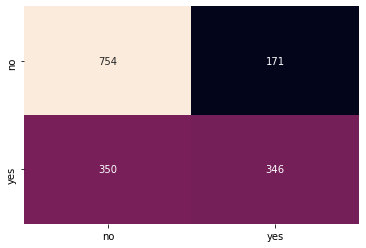

In [52]:
from sklearn.metrics import confusion_matrix

res=confusion_matrix(y_test,y_pred)

sns.heatmap(res, annot=True, fmt='d', cbar=False, xticklabels=['no','yes'],yticklabels=['no','yes'])

<BarContainer object of 20 artists>

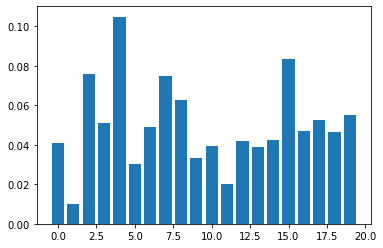

In [53]:
plt.bar([x for x in range(len(final_gb.feature_importances_))],final_gb.feature_importances_)

### 3. Comparison between models

In [54]:
from sklearn.model_selection import cross_validate

scores=cross_validate(LogisticRegression(), X_train, y_train, cv=7, scoring='accuracy', return_train_score=True)
np.mean(scores['train_score'])
np.mean(scores['test_score'])






0.597655044739278

In [55]:
scores=cross_validate(RandomForestClassifier(random_state=1), X_train, y_train, cv=7, scoring='accuracy', return_train_score=True)
np.mean(scores['train_score'])
np.mean(scores['test_score'])

0.6490280777537798

In [56]:
scores=cross_validate(GradientBoostingClassifier(random_state=1), X_train, y_train, cv=7, scoring='accuracy', return_train_score=True)
np.mean(scores['train_score'])
np.mean(scores['test_score'])

0.6439370564640543

In [57]:
df_train[['dec']]

,dec
0,1
1,1
2,1
3,1
4,1
...,...
8373,0
8374,0
8375,0
8376,0
